# In this file LR is used for both balanced and imbalanced dataset.

* resource :https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/


### The sensitivity with balanced class is improved to a great extent

In [34]:

#Import the liberaries 
import pandas as pd
import numpy as np
# visualization 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report , roc_auc_score, f1_score,precision_score, recall_score
from plot_metric.functions import BinaryClassification
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import PowerTransformer

# Read the data after cleaning and pre-processing 

In [35]:
data_final=pd.read_hdf("data_final.h5", key='data_final')

In [36]:
data_final=data_final[data_final['patient_gender']=='M']

In [37]:
data_final.columns

Index(['num_elixhauser_2_years_full', 'elix_index', 'num_admits_1_year',
       'num_scu_admits_1_year', 'num_procs_dad_1_year',
       'num_procs_nacrs_1_year', 'num_procs_tot_1_year', 'spec_pat_num_age',
       'specimen_year_month_collected_con', 'collected_in_hospital',
       'collected_in_ed', 'collected_in_ltc', 'collected_in_dsl',
       'ltc_resident_during_collection', 'dsl_resident_during_collection',
       'spec_pat_agecat', 'patient_gender', 'num_elixhauser_2_years_full_cat',
       'symptomatic_during_collection', 'interp_result', 'y_m_',
       'died_within_60_days', 'spec_pat_agecat_18-29', 'spec_pat_agecat_30-39',
       'spec_pat_agecat_40-49', 'spec_pat_agecat_50-59',
       'spec_pat_agecat_60-69', 'spec_pat_agecat_70-79', 'spec_pat_agecat_80+',
       'patient_gender_F', 'patient_gender_M',
       'num_elixhauser_2_years_full_cat_0',
       'num_elixhauser_2_years_full_cat_1+', 'symptomatic_during_collection_N',
       'symptomatic_during_collection_U', 'symptomat

In [42]:
data_final = data_final.drop(['patient_gender', 'patient_gender_M', 'patient_gender_F'], axis=1)


In [43]:
data_final.columns

Index(['num_elixhauser_2_years_full', 'elix_index', 'num_admits_1_year',
       'num_scu_admits_1_year', 'num_procs_dad_1_year',
       'num_procs_nacrs_1_year', 'num_procs_tot_1_year', 'spec_pat_num_age',
       'specimen_year_month_collected_con', 'collected_in_hospital',
       'collected_in_ed', 'collected_in_ltc', 'collected_in_dsl',
       'ltc_resident_during_collection', 'dsl_resident_during_collection',
       'spec_pat_agecat', 'num_elixhauser_2_years_full_cat',
       'symptomatic_during_collection', 'interp_result', 'y_m_',
       'died_within_60_days', 'spec_pat_agecat_18-29', 'spec_pat_agecat_30-39',
       'spec_pat_agecat_40-49', 'spec_pat_agecat_50-59',
       'spec_pat_agecat_60-69', 'spec_pat_agecat_70-79', 'spec_pat_agecat_80+',
       'num_elixhauser_2_years_full_cat_0',
       'num_elixhauser_2_years_full_cat_1+', 'symptomatic_during_collection_N',
       'symptomatic_during_collection_U', 'symptomatic_during_collection_Y',
       'interp_result_Negative', 'interp

In [44]:
# these are the features that we have finilized to give the model 

feature_list_for_training=[
'spec_pat_num_age',
# Gender-male
# 'patient_gender_M',
# Specimen Collection location
'collected_in_ed', 'collected_in_hospital', 'collected_in_dsl',
# Resident During Collection
'dsl_resident_during_collection',
# Symptomatic During Collection
'symptomatic_during_collection_U', 'symptomatic_during_collection_Y',
# Result of the covid test
'interp_result_Positive',
# Specimen year-month collection
'y_m__2020-10',
'y_m__2020-11', 'y_m__2020-12', 'y_m__2020-3', 'y_m__2020-4',
'y_m__2020-5', 'y_m__2021-3', 'y_m__2020-7', 'y_m__2020-8',
'y_m__2020-9', 'y_m__2021-1', 'y_m__2021-2', 
# Num of Elixhauser 
'chf_2_years_full_1', 'htn_unc_2_years_full_1',
'cancer_mets_2_years_full_1', 'fluid_elec_dis_2_years_full_1',
'card_arrh_2_years_full_1', 'valv_dis_2_years_full_1',
'pcd_2_years_full_1', 'pvd_2_years_full_1', 'htn_c_2_years_full_1',
'paral_2_years_full_1', 'oth_neur_dis_2_years_full_1',
'cpd_2_years_full_1', 'diab_2_years_full_1',
'hypothyroidism_2_years_full_1', 'ren_fail_2_years_full_1',
'liver_dis_2_years_full_1', 'pep_ulc_exc_bld_2_years_full_1',
'aids_hiv_2_years_full_1', 'lymph_2_years_full_1',
'tumour_no_mets_2_years_full_1', 'rheum_col_vasc_dis_2_years_full_1',
'coag_2_years_full_1', 'obes_2_years_full_1', 'wt_loss_2_years_full_1',
'anemia_2_years_full_1', 'alc_abuse_2_years_full_1',
'drug_abuse_2_years_full_1', 'psych_2_years_full_1',
'depress_2_years_full_1',
#Num of Admits for 1 year
'num_admits_1_year', 'num_scu_admits_1_year',
#Num Procedures for 1 year
'num_procs_dad_1_year', 'num_procs_nacrs_1_year',
]


# trian the model by Imbalanced data 

### Classes percentage in the training as there are imbalanceness:
0    87.92735
1    12.07265
Name: died_within_60_days, dtype: float64
Optimization terminated successfully.
         Current function value: 0.301003
         Iterations 7
Confusion Matrix : 
 [[805  13]
 [106  13]]
Test accuracy =  0.8729989327641409
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       818
           1       0.50      0.11      0.18       119

    accuracy                           0.87       937
   macro avg       0.69      0.55      0.56       937
weighted avg       0.83      0.87      0.84       937

F1 Score: 0.1793103448275862
AUC: 0.55%


/Users/fuzzysha/software/miniconda3/envs/hproj/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


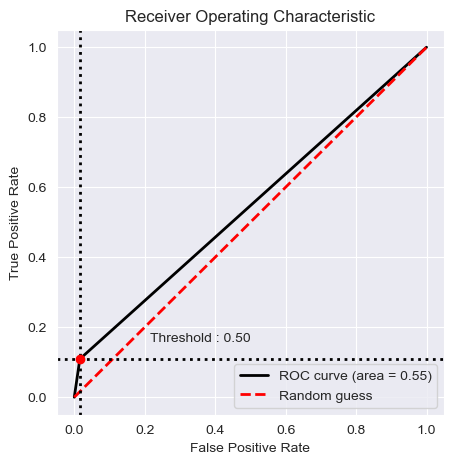

In [45]:
# separate the features for training 
X=data_final[feature_list_for_training]
# separate the labels for the training 
y=data_final['died_within_60_days']

# add the constant to the x features
X=sm.add_constant(X)
# split the dataset into train and tes set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

######################################

print("### Classes percentage in the training as there are imbalanceness:") 
print(y_train.value_counts()*100/len(y_train))

# fit the model
log_reg=sm.Logit(y_train,X_train ).fit()

# after fitting the model, we need to test the model on the x_test (y_hat are the predicted probabilities)
yhat = log_reg.predict(X_test)
# recieve the labels from the y_hat for the classification
prediction = list(map(round, yhat))

# If I understand this – you rounded the yhat to create a binary variable for comparison? 
# Then you created the confusion matrix for these predictions?
# Can you try calculating the auc for y_test using yhat as a continuous measure?


# Usually, we’d choose the cutoff so that the outcome is more balanced, using either the youden index 
# or a cutoff that ensures that the sum 1’s based on the predicted scores = the sum of observed scores=1. 
# I think this is leading to the poor calibration we see in the confusion matrix.



# confusion matrix
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)

# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

print(classification_report(y_test, prediction))

print("F1 Score: {}".format(f1_score(y_test, prediction)))

roc_auc = roc_auc_score(y_test, prediction)
print('AUC: %.2f' % roc_auc + "%")



# Visualisation with plot_metric
bc = BinaryClassification(y_test, prediction, labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

# summary of the model trained by imbalanced classes 

In [46]:
# print summary of the model trained with Imbalanced data
print(log_reg.summary())

                            Logit Regression Results                           
Dep. Variable:     died_within_60_days   No. Observations:                 8424
Model:                           Logit   Df Residuals:                     8370
Method:                            MLE   Df Model:                           53
Date:                 Sat, 29 Jul 2023   Pseudo R-squ.:                  0.1829
Time:                         16:28:15   Log-Likelihood:                -2535.6
converged:                        True   LL-Null:                       -3103.1
Covariance Type:             nonrobust   LLR p-value:                7.714e-203
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -7.3134      0.361    -20.248      0.000      -8.021      -6.605
spec_pat_num_age                      0.0509      0.00

# Odjusted Odds Ratios for male

In [48]:
# Assuming you have already fitted your logistic regression model and stored it in log_reg_model
# For example: log_reg_model = sm.Logit(y, X).fit()

# Get the summary of the logistic regression model
log_reg_summary = log_reg.summary()

# Convert the summary to HTML
html_summary = log_reg_summary.tables[1].as_html()

# Read the HTML table into a DataFrame
df_summary = pd.read_html(html_summary, header=0, index_col=0)[0]

# Calculate the odds ratio and add it to the DataFrame
df_summary['Odds Ratio'] = df_summary['coef'].apply(lambda x: round(np.exp(x), 2))
df_summary['[0.025'] = df_summary['[0.025'].apply(lambda x: round(np.exp(x), 2))
df_summary['0.975]'] = df_summary['0.975]'].apply(lambda x: round(np.exp(x), 2))
df_summary=df_summary[['Odds Ratio','[0.025', '0.975]','P>|z|']]
# Display the DataFrame with the odds ratio



,Odds Ratio,[0.025,0.975],P>|z|
const,0.00,0.00,0.00,0.000
spec_pat_num_age,1.05,1.04,1.06,0.000
collected_in_ed,4.07,2.82,5.86,0.000
collected_in_hospital,3.21,2.15,4.79,0.000
collected_in_dsl,1.04,0.65,1.64,0.880
dsl_resident_during_collection,0.56,0.37,0.86,0.008
symptomatic_during_collection_U,1.28,1.05,1.57,0.016
symptomatic_during_collection_Y,1.77,1.43,2.19,0.000
interp_result_Positive,4.25,3.40,5.32,0.000
y_m__2020-10,1.97,1.39,2.79,0.000


In [50]:
df_summary.sort_values('Odds Ratio', ascending=False)

,Odds Ratio,[0.025,0.975],P>|z|
y_m__2020-3,4.85,3.48,6.75,0.000
interp_result_Positive,4.25,3.40,5.32,0.000
collected_in_ed,4.07,2.82,5.86,0.000
collected_in_hospital,3.21,2.15,4.79,0.000
y_m__2020-4,3.16,2.45,4.08,0.000
y_m__2020-11,2.61,1.89,3.61,0.000
y_m__2020-5,2.59,1.92,3.50,0.000
y_m__2020-12,2.45,1.78,3.38,0.000
y_m__2020-10,1.97,1.39,2.79,0.000
y_m__2021-1,1.86,1.26,2.73,0.002
